# **CH.SC.U4CSE23239 - SVM - Exercise 2**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn
from google.colab import files

uploaded = files.upload()
data = pd.read_csv('spam1.csv')

Saving spam1.csv to spam1.csv


In [2]:
print(data.shape)
data.head()

(100, 3)


,word_frequency,message_length,label
0,7,221,not_spam
1,20,209,spam
2,29,247,spam
3,15,33,spam
4,11,114,not_spam


In [4]:
data.isnull().sum()

,0
word_frequency,0
message_length,0
label,0


In [6]:
feature_cols = ['word_frequency','message_length']
X = data[feature_cols]
y = data.label
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(70, 2)

(70,)

(30, 2)

(30,)

In [7]:
model = SVC(kernel='rbf', random_state = 0)
model.fit(x_train, y_train)
svc_pred = model.predict(x_test)
print('svc_prediction : ',svc_pred)

svc_prediction :  ['spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'not_spam'
 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'not_spam' 'spam' 'spam'
 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'not_spam']


In [8]:
conf_mat = metrics.confusion_matrix(y_test, svc_pred)
print('SVC [ kernel - rgf]')
print('Confusion Matrix : \n',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, svc_pred)
print('Accuracy Score : ',Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_pred,y_test))

SVC [ kernel - rgf]
Confusion Matrix : 
 [[ 3  6]
 [ 0 21]]
Accuracy Score :  0.8
Accuracy in Percentage :  80 %
              precision    recall  f1-score   support

    not_spam       0.33      1.00      0.50         3
        spam       1.00      0.78      0.88        27

    accuracy                           0.80        30
   macro avg       0.67      0.89      0.69        30
weighted avg       0.93      0.80      0.84        30



[Text(0.5, 1.0, 'SVC [rbf]')]

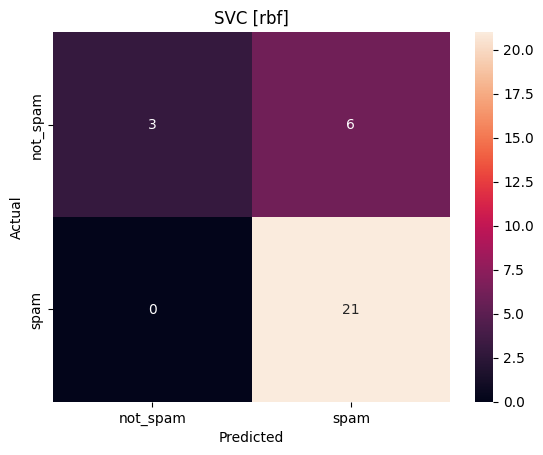

In [9]:
conf_mat = pd.crosstab(y_test, svc_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title = 'SVC [rbf]')

In [10]:
model = SVC(kernel='linear', random_state = 0)
model.fit(x_train, y_train)
svc_pred = model.predict(x_test)
print('svc_prediction : ',svc_pred)

svc_prediction :  ['spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'not_spam'
 'not_spam' 'spam' 'spam' 'spam' 'not_spam' 'not_spam' 'spam' 'spam'
 'not_spam' 'not_spam' 'spam' 'spam' 'spam' 'not_spam' 'spam' 'spam'
 'not_spam' 'spam' 'not_spam' 'not_spam' 'not_spam']


In [11]:
conf_mat = metrics.confusion_matrix(y_test, svc_pred)
print('SVC [ kernel - linear]')
print('Confusion Matrix : \n',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, svc_pred)
print('Accuracy Score : ',Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_pred,y_test))

SVC [ kernel - linear]
Confusion Matrix : 
 [[ 9  0]
 [ 2 19]]
Accuracy Score :  0.9333333333333333
Accuracy in Percentage :  93 %
              precision    recall  f1-score   support

    not_spam       1.00      0.82      0.90        11
        spam       0.90      1.00      0.95        19

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.93      0.93        30



[Text(0.5, 1.0, 'SVC [linear]')]

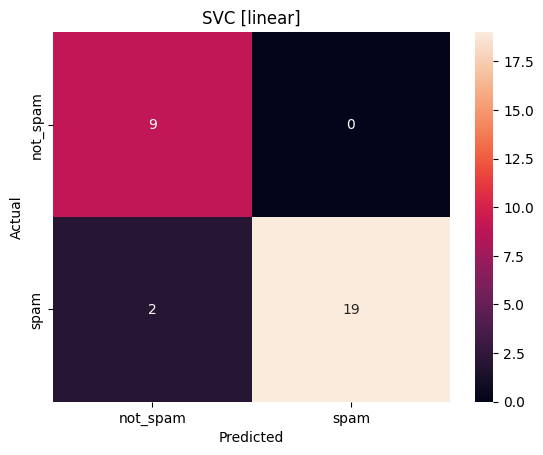

In [12]:
conf_mat = pd.crosstab(y_test, svc_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title = 'SVC [linear]')